What i have to do is:
    1. I have to use F.cross_entropy. 
    2. expected to see the same result. 
    And answer the question why F.cross_entropy is better.
    
let's goooooo

In [49]:
But what is cross_entropy?

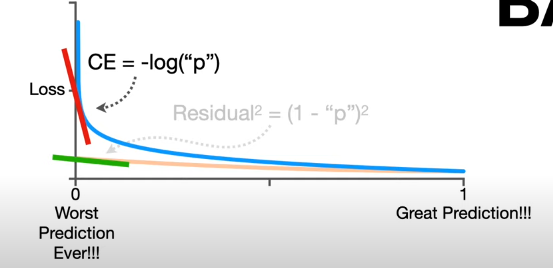
graph of -ln(x)

cross entropy is -ln(x) where x is the predicted output by our model.
As we can see from our graph if the prediction by our model is very less our loss will be very high. 
hence cross_entropy punish the network heavily when it makes error

ani bad prediction huda, log(x) ko slop ta ekdam thulo xa ni magnitude ma, hence bigger step jump hune vayo to get to good prediction. (ramro sita understand ta vako xaina).


In [ ]:
is there any functions better than -ln(x)?

why cross_entropy is better than negative logliklihood?
-> my ans (maybe wrong)
-> wait, aren't these the same?

In [ ]:
Conclsuion:

    CrossEntropy and negative log likelihood are same. 
    they have same formula.
    (I may be wrong, see later)

In [1]:


import torch
words = open('names.txt','r').read().splitlines()

In [2]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [3]:
import torch.nn.functional as F

In [4]:
# create the dataset

xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1,ch2,ch3 in zip(chs,chs[1:],chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    xs.append((ix1*27)+ix2)
    ys.append(ix3)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27*27, 27), generator=g, requires_grad=True)

number of examples:  196113


In [5]:
from sklearn.model_selection import train_test_split

X_train,X_temp,y_train,y_temp = train_test_split(xs,ys,test_size = 0.2, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp,y_temp, test_size=0.5, random_state = 42)

# X_train, y_train ma 80% data xa ani
#X_dev ra X_test ma 10 10% data xa ni

In [6]:
# print(X_train.size())
# print(X_dev.size())
# print(X_test.size())
train_size = len(X_train)
dev_size = len(X_dev)
test_size = len(y_test)
# X_train = X_train.float()
# y_train = y_train.float()
# X_dev = X_dev.float()
# y_dev = y_dev.float()
# y_train = y_train.float()
# y_test = y_test.float()

In [7]:
# NOW i have to create a variable to store the dev_loss every time. if at some point dev_loss(new) > dev_loss(past) 
#stop the training

#Also let's find after how many iteration we did early stopping
#Also let's see if doing early stopping make our results better

dev_loss = 1e10

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
import torch.nn as nn

criterion = nn.CrossEntropyLoss()

In [15]:
for k in range(50):
    
    
    #forward pass for train-set
    
#     xenc = F.one_hot(X_train, num_classes = (27*27)).float() #input to the network: one-hot encoding
#     logits = no_of_examples * 27
    
    logits = W[X_train]  #log-counts predict gareko hai
    counts = logits.exp()  #coutns, equivalent to N
    probs = counts/counts.sum(1,keepdim = True) #probabilities for next character
    
    loss = criterion(logits,y_train) + 0.01 * (W**2).mean()  # i haven't understood this second part
    
    
    #forward pass for dev-set
    logits_dev = W[X_dev]
    counts_dev = logits_dev.exp()
    probs_dev = counts_dev/ counts_dev.sum(1, keepdim = True)
    loss_2 = criterion(logits_dev,y_dev)
    
    print(f"dev_loss: {loss_2.item()}")
    
    if(dev_loss < loss_2):
        print(f"early stopping done, stoped at: {k}")
        break
    else:
        dev_loss = loss_2
    #maile bujeko yo loss chai,
#     probs[torch.arrange(num),ys] this gives probability predcited by our model for ground truth. if it is less than 
#     100% model we give it a loss i.e -loglikelihood now model updates it's parameters.
    
#     Q. I am super-amazed how this loss worked? 
#     --> because we are not always sure what letters comes after pairs in real names. any letter can come. 
#         but some are more likely.
#     --> i think our model will twiks our W such that it gives more probabilty for more likely words based on training set
    
#     Q. Still confused how loss will converged? I suspect it will not. (noob me, think later)
#     Q. 

     
    print(f"loss: {loss.item()}")
    #backward pass:
    
    W.grad = None # paile sabaile gradient lai zero gareko
    loss.backward()  #magic hehe
    
    #update
    
    W.data += -50*W.grad   #remember to increment opp to direction of gradient, otherwise face the consequences)

    

dev_loss: 2.312203884124756
loss: 2.323885440826416
dev_loss: 2.3109867572784424
loss: 2.322636842727661
dev_loss: 2.3097829818725586
loss: 2.3214008808135986
dev_loss: 2.308591365814209
loss: 2.3201780319213867
dev_loss: 2.30741286277771
loss: 2.3189685344696045
dev_loss: 2.306246519088745
loss: 2.3177711963653564
dev_loss: 2.3050923347473145
loss: 2.3165857791900635
dev_loss: 2.303950786590576
loss: 2.315412759780884
dev_loss: 2.3028204441070557
loss: 2.3142521381378174
dev_loss: 2.3017020225524902
loss: 2.3131027221679688
dev_loss: 2.3005950450897217
loss: 2.3119654655456543
dev_loss: 2.299499034881592
loss: 2.3108391761779785
dev_loss: 2.298414707183838
loss: 2.3097243309020996
dev_loss: 2.2973406314849854
loss: 2.308619737625122
dev_loss: 2.2962775230407715
loss: 2.3075268268585205
dev_loss: 2.295225143432617
loss: 2.3064446449279785
dev_loss: 2.2941830158233643
loss: 2.305372476577759
dev_loss: 2.2931509017944336
loss: 2.3043110370635986
dev_loss: 2.2921295166015625
loss: 2.30325

In [17]:


xenc_test = F.one_hot(X_test, num_classes = (27*27)).float()
logits_test = xenc_test @ W
counts_test = logits_test.exp()
probs_test = counts_test/ counts_test.sum(1, keepdim = True)
loss_3 = -probs_test[torch.arange(test_size),y_test].log().mean()

print(loss_3.item())

2.2794530391693115


In [21]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(10):

  out = []
  ix = 0
  gt = torch.randint(1,27,(1,)).item()  
  while True:

    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    ix = (ix*27) + (gt)
    out.append(itos[gt])
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27*27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    ix , gt = gt, ix
    
    if gt == 0:
      break
  print(''.join(out))

faunide
uclkcgaz
bulisay
elin
ma
bri
shltonian
gagezvksiania
franiahviassdbyuinrwibwlassiyanayla
xty
